
# Procesadores Opticos

## 4F

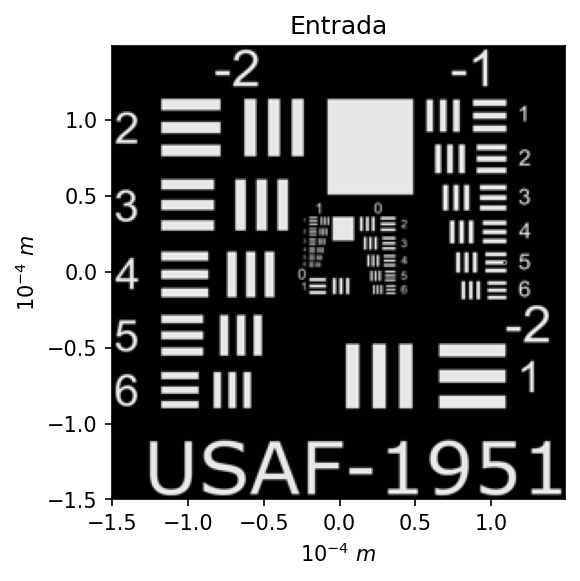

In [ ]:
import numpy as np
import scipy.fft as sft
import matplotlib.pyplot as plt
from PIL import Image as im

def convft(U,H,dx):
    """
    Realiza la convolucion 2D de las matrices U,H usando la transformada rapida de Fourier. U, H deben tener la misma forma.
    
    Parameters
    ----------
    U : Array Numpy
        Uno de las matrices a convolucionar
    H : Array Numpy
        Otra de las matrices a convolucionar
    dx : Float
        Tamaño de muestreo de las funciones a convolucionar. Necesario para preservar escala.

    Returns
    -------
    U2
        Arreglo de numpy con la convolucio de U y H

    """
    U2=sft.fft2(sft.fftshift(U))*(dx**2)
    U2=H*U2
    U2=sft.ifftshift(sft.ifft2(U2)*(1/dx**2))
    return U2

def circ(x): # FUNCION circulo EN 2D
        s=np.zeros(x.shape)
        s[(x)<1]=1.0
        return s
    
def rect2D(x,y):
    n=len(x)
    m=len(y)
    R1=np.zeros([1,n])
    R2=np.zeros([1,n])
    R1[0,x>-1/2]=1
    R2[0,x<1/2]=1
    Rx=R1*R2
    R1=np.zeros([1,m])
    R2=np.zeros([1,m])
    R1[0,y>-1/2]=1
    R2[0,y<1/2]=1
    Ry=R1*R2
    return Rx.T@Ry

def tajada(M1,M2,x,y):
    """
    Esta funcion permite recortar una seccion centrada en x, y del array M1 de
    tamaño igual al array M2. Las coordenadas x,y son dadas en un sistema cartesiano centrado.

    Parameters
    ----------
    M1 : Array Numpy
        Arreglo del que se recorta una sección.
    M2 : Array Numpy
        Arreglo que determina el tamaño del recorte.
    x : Integer
        Coordenada en x del centro del recorte en un sistema cartesiano centrado para M1.
    y : Integer
        Coordenada en y del centro del recorte en un sistema cartesiano centrado para M1..

    Raises
    ------
    ValueError
        Si el tamaño del area a recortar o las coordenadas exceden el tamaño de la matriz original se disparara este error.

    Returns
    -------
    MC
        Arreglo de numpy con forma igual a M2.

    """
    (m,n)=M1.shape
    (mm,nn)=M2.shape
    if mm>m or nn>n:
        raise ValueError('La matriz recortada debe ser mas pequeña que la original')
    MC=M1[np.int32(np.ceil((m-mm)*0.5)+y):np.int32(np.ceil((m+mm)*0.5)+y),np.int32(np.ceil((n-nn)*0.5)+x):np.int32(np.ceil((m+nn)*0.5)+x)]
    return MC

def fusion(M1,M2,x,y):
    """
    Esta funcion permite insertar M2 a una seccion centrada en (x, y) del array M1.
    Las coordenadas x,y son dadas en un sistema cartesiano centrado.

    Parameters
    ----------
    M1 : Array Numpy
        Arreglo al que se inserta una sección.
    M2 : Array Numpy
        Arreglo a insertar.
    x : Integer
        Coordenada en x del centro del recorte en un sistema cartesiano centrado para M1.
    y : Integer
        Coordenada en y del centro del recorte en un sistema cartesiano centrado para M1..

    Raises
    ------
    ValueError
        Si el tamaño del area a insertar o las coordenadas exceden el tamaño de la matriz original se disparara este error.

    Returns
    -------
    MC
        Arreglo de numpy con forma igual a M1.

    """
    (m,n)=M1.shape
    (mm,nn)=M2.shape
    if mm>m or nn>n:
        raise ValueError('La matriz a instertar debe ser mas pequeña que la original')
    M1[np.int32(np.ceil((m-mm)*0.5)+y):np.int32(np.ceil((m+mm)*0.5)+y),np.int32(np.ceil((n-nn)*0.5)+x):np.int32(np.ceil((m+nn)*0.5)+x)]=M2
    MC=np.copy(M1)
    return MC

fig = plt.figure(dpi=150)
L=0.3e-3
M=250
dx=L/M
I=im.open('./6.bmp')
I=I.resize([M,M])
I=1-np.asarray(I)
I=I*1.
I=I/np.max(np.max(I))
I=I-np.min(np.min(I))
ug=(I)

x1=np.linspace(-L/2,L/2-dx,M)
y1=np.linspace(-L/2,L/2-dx,M)

plt.imshow(np.abs(ug)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Entrada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()


## Simulacion con FFT

100000.00000000001
(250,)


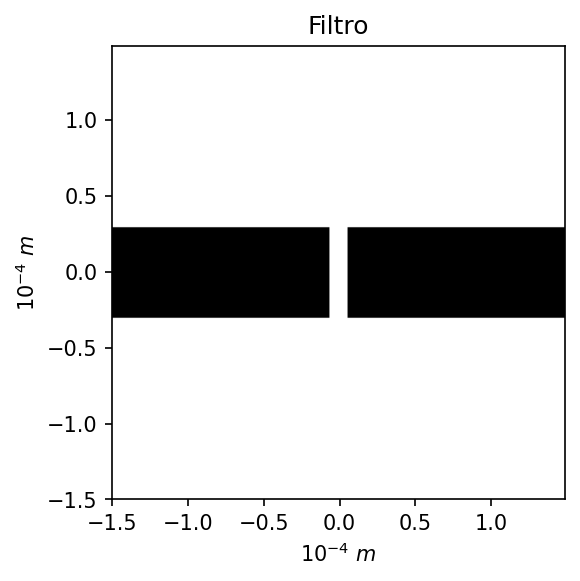

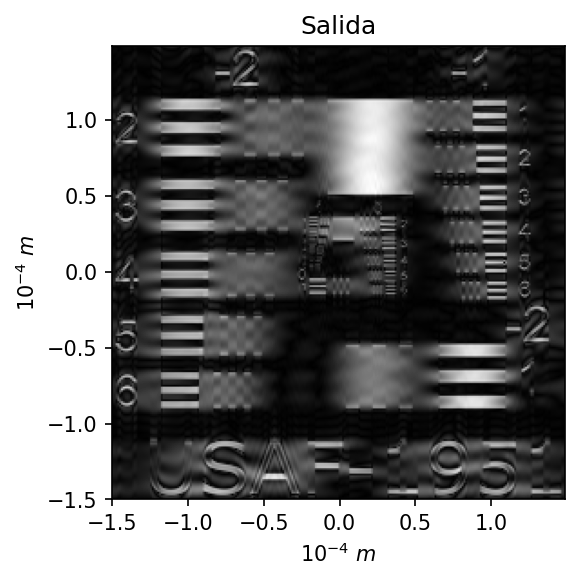

In [ ]:
wl=0.5*10**(-6)
wxp=6.25E-3
zxp=125.0E-3
f0=wxp/(wl*zxp)
print(f0)
fx=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)
fy=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)
print(fx.shape)
fxx,fyy=np.meshgrid(fx,fy)

UG1=sft.fftshift(sft.fft2(sft.fftshift(ug)))


#Filtro paso bajo en x
H=np.ones([M,M])

H1=np.zeros([50,120])

H=fusion(H,H1,-65,0)
H=fusion(H,H1,65,0)
UG=UG1*H
sg=sft.fftshift(sft.ifft2(sft.fftshift(UG)))
    
fig = plt.figure(dpi=150)

plt.imshow(np.abs(H)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Filtro')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()
fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Salida')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

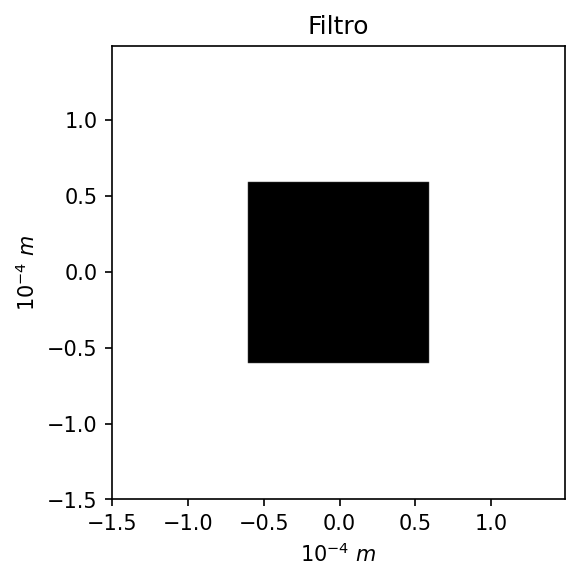

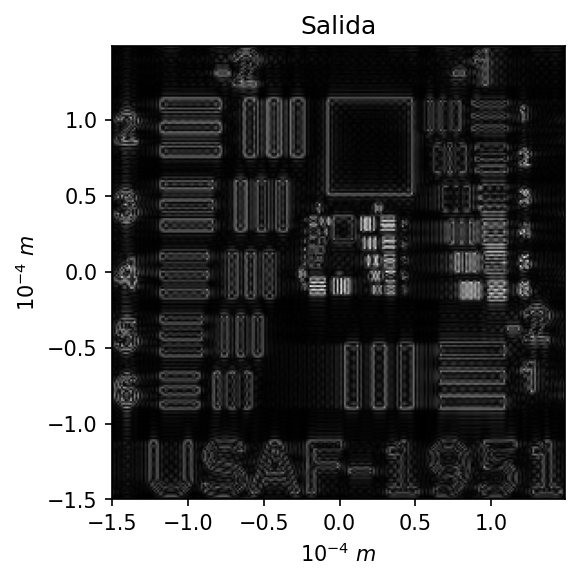

In [ ]:
#Filtro paso alto
H=np.ones([M,M])

H1=np.zeros([100,100])

H=fusion(H,H1,-0,0)
H=fusion(H,H1,0,0)
UG=UG1**H
sg=sft.fftshift(sft.ifft2(sft.fftshift(UG)))
    
fig = plt.figure(dpi=150)

plt.imshow(np.abs(H)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Filtro')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()
fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Salida')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

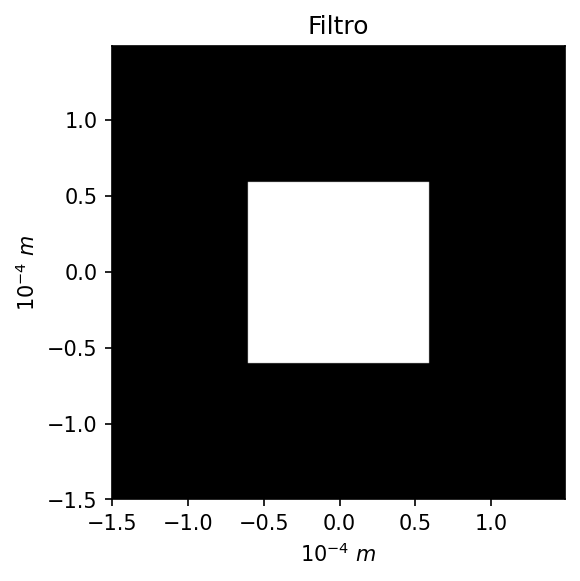

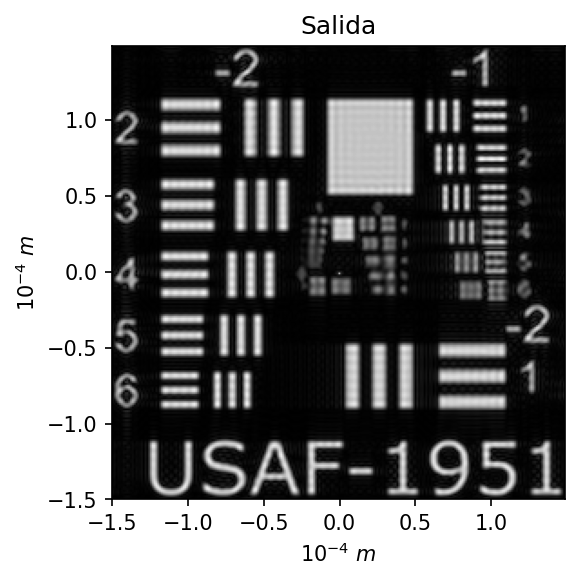

In [ ]:
#Filtro paso bajo
H=np.zeros([M,M])

H1=np.ones([100,100])

H=fusion(H,H1,-0,0)
H=fusion(H,H1,0,0)
UG=UG1**H
sg=sft.fftshift(sft.ifft2(sft.fftshift(UG)))
    
fig = plt.figure(dpi=150)

plt.imshow(np.abs(H)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Filtro')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()
fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Salida')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

In [ ]:
zc=dx*L/wl


def ftfresnel(M,N,dx,wl,z):
    """
    Esta funcion genera una funcion de transferencia  de tamaño (n,m) para la transformada de fresnel con distancia z tamaño de píxel dx y longitud de onda wl.
    Usar tamaños cuadrados para evitar artefactos de anisotropia, o generar una funcion cuadrada de mayor tamaño y recortar el tamaño deseado. 
    El programa determina si se genera la funcion de transferencia directamente.
    
    Parameters
    ----------
    M : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    N : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    dx : Float
        Tamaño de píxel
    wl : Float
        Longitud de onda
    z : Float
        Distancia de propagacion.

    Returns
    -------
    H
        Arreglo de numpy con tamaño N,M

    """
    Lx=M*dx
    Ly=N*dx
    k=2*np.pi/wl
    x=np.arange(-Lx/2,Lx/2,dx)
    y=np.arange(-Ly/2,Ly/2,dx)
    fx=np.arange(-1/(2*dx),1/(2*dx),1/Lx)
    fy=np.arange(-1/(2*dx),1/(2*dx),1/Ly)
    zmax=(dx*Lx)/wl
    FX,FY=np.meshgrid(fx,fy)
    H=np.exp(-1j*wl*z*np.pi*(FX**2+FY**2))
    H=sft.fftshift(H)
    return H

def irfresnel(M,N,dx,wl,z):
    """
    Esta funcion genera una funcion de tranfserencia  de tamaño (n,m) para la transformada de fresnel con distancia z tamaño de píxel dx y longitud de onda wl.
    Usar tamaños cuadrados para evitar artefactos de anisotropia, o generar una funcion cuadrada de mayor tamaño y recortar el tamaño deseado. 
    El programa genera la funcion de transferencia por medio de la respuesta al impulso en base a los paramtros introducidos.
    
    Parameters
    ----------
    M : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    N : Integer
        Tamaño de la funcion de transferencia en pixeles en la direccion horizontal
    dx : Float
        Tamaño de píxel
    wl : Float
        Longitud de onda
    z : Float
        Distancia de propagacion.

    Returns
    -------
    H
        Arreglo de numpy con tamaño N,M

    """
    Lx=M*dx
    Ly=N*dx
    k=2*np.pi/wl
    x=np.arange(-Lx/2,Lx/2,dx)
    y=np.arange(-Ly/2,Ly/2,dx)
    fx=np.arange(-1/(2*dx),1/(2*dx),1/Lx)
    fy=np.arange(-1/(2*dx),1/(2*dx),1/Ly)
    zmax=(dx*Lx)/wl
    X,Y=np.meshgrid(x,y)
    h=(1/(1j*wl*z))*np.exp(1j*k/(2*z)*(X**2+Y**2))
    H=sft.fft2(sft.fftshift(h))*(dx**2)  
    return H

def convft(U,H,dx):
    """
    Realiza la convolucion 2D de las matrices U,H usando la transformada rapida de Fourier. U, H deben tener la misma forma.
    
    Parameters
    ----------
    U : Array Numpy
        Uno de las matrices a convolucionar
    H : Array Numpy
        Otra de las matrices a convolucionar
    dx : Float
        Tamaño de muestreo de las funciones a convolucionar. Necesario para preservar escala.

    Returns
    -------
    U2
        Arreglo de numpy con la convolucio de U y H

    """
    U2=sft.fft2(sft.fftshift(U))*(dx**2)
    U2=H*U2
    U2=sft.ifftshift(sft.ifft2(U2)*(1/dx**2))
    return U2

def tfoptica(u1,wl,dx,f):
    
    [m,n]=np.shape(u1)   
    L=m*dx
    zc=dx*L/wl
    x=np.linspace(-L/2, L/2-dx,m)
    y=np.linspace(-L/2, L/2-dx,n)
    xx, yy= np.meshgrid(x,y)
    H=np.exp(-1j*(np.pi/(f*wl))*(xx**2+yy**2))
    if f<zc:
        fr=ftfresnel(n,m,dx,wl,f)
    else:
        fr=irfresnel(n,m,dx,wl,f)  
    u2=convft(u1,fr,dx)
    u2=u2*H
    u2=convft(u2,fr,dx)
    return u2
    
print(zc)

0.0007199999999999999


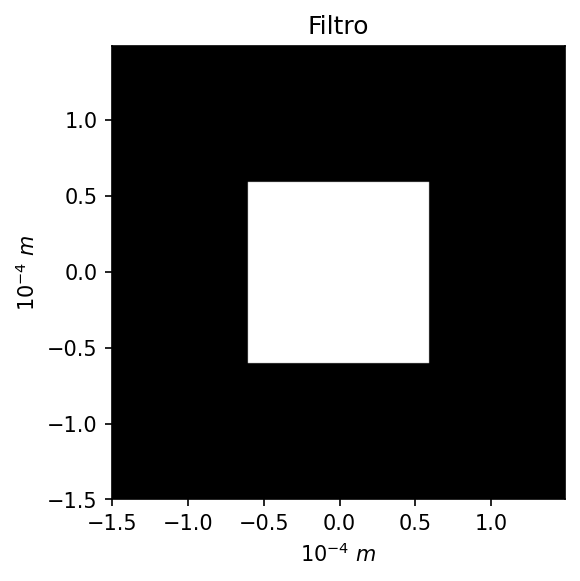

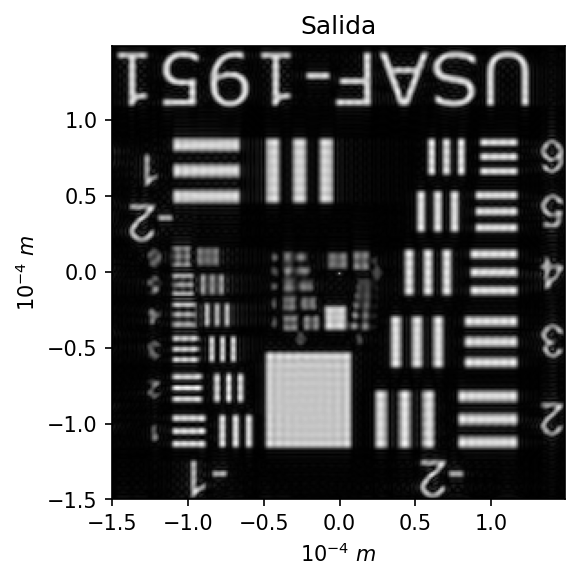

In [ ]:
UG=tfoptica(ug,wl,dx,zc)
#Filtro paso bajo
H=np.zeros([M,M])

H1=np.ones([100,100])

H=fusion(H,H1,-0,0)
H=fusion(H,H1,0,0)
UG=UG1**H
sg=tfoptica(UG,wl,dx,zc)
    
fig = plt.figure(dpi=150)

plt.imshow(np.abs(H)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Filtro')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()
fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Salida')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()


## Filtros espectrales con JTC

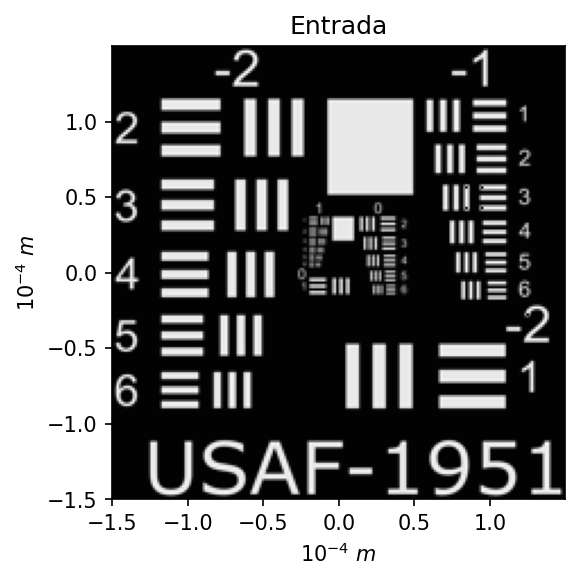

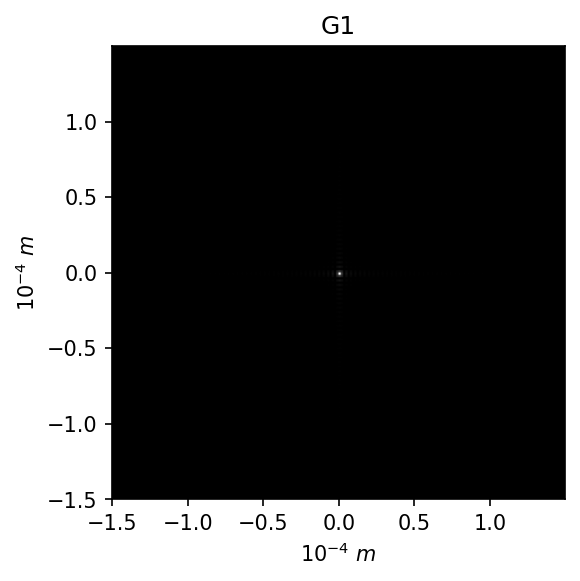

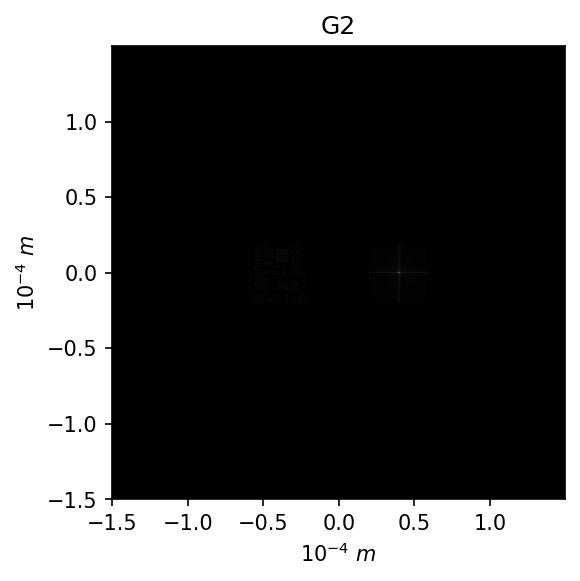

In [ ]:
M=1500
D1=200
D2=200
b=200
L=0.3e-3
dx=L/M
I=im.open('./6.bmp')


I=I.resize([D1,D1])
I=1-np.asarray(I)
I=I*1.
I=I/np.max(np.max(I))
I1=I-np.min(np.min(I))

#Filtro paso bajo
I2=np.zeros([D2,D2])
I2=fusion(I2,np.ones([100,100]),0,0)
I2=sft.fftshift(sft.fft2(sft.fftshift(I2)))

#Filtro paso alto
I2=np.ones([D2,D2])
I2=fusion(I2,np.zeros([100,100]),0,0)
I2=sft.fftshift(sft.fft2(sft.fftshift(I2)))

x1=np.linspace(-L/2,L/2-dx,M)
y1=np.linspace(-L/2,L/2-dx,M)

zc=dx*L/wl
ug=np.zeros([M,M])*1j
ug=fusion(ug,I1,-b,0)
ug=fusion(ug,I2,b,0)

    
fig = plt.figure(dpi=150)
plt.imshow(np.abs(I1)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Entrada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()
fig = plt.figure(dpi=150)
plt.imshow(np.abs(I2)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('G1')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()
fig = plt.figure(dpi=150)
plt.imshow(np.abs(ug)**(1/3), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('G2')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()


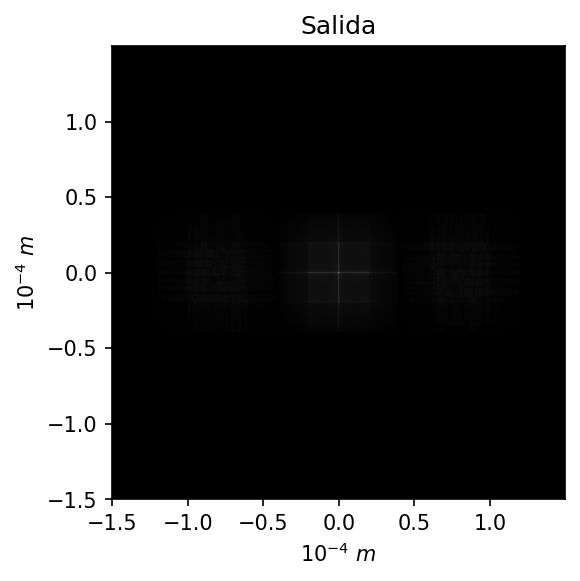

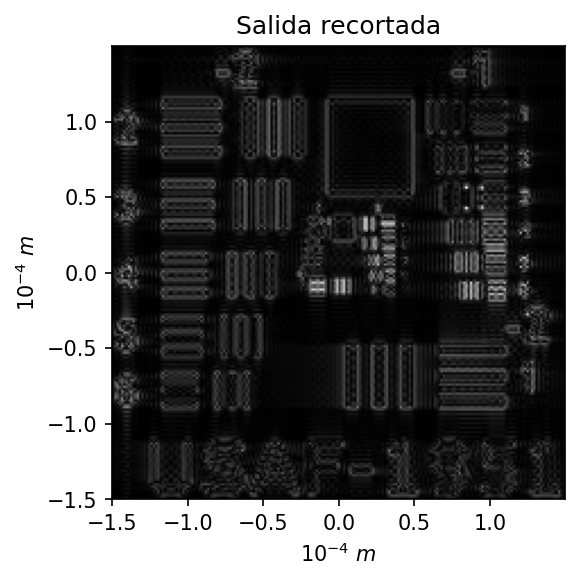

In [ ]:
UG=tfoptica(ug,wl,dx,zc)
Ig=UG*np.conj(UG)



sg=tfoptica(Ig,wl,dx,zc)



fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg)**(1/4), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Salida')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

sg=tajada(sg,np.zeros([D1,D1]),-2*b,0)
fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Salida recortada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

## Deteccion de patrones

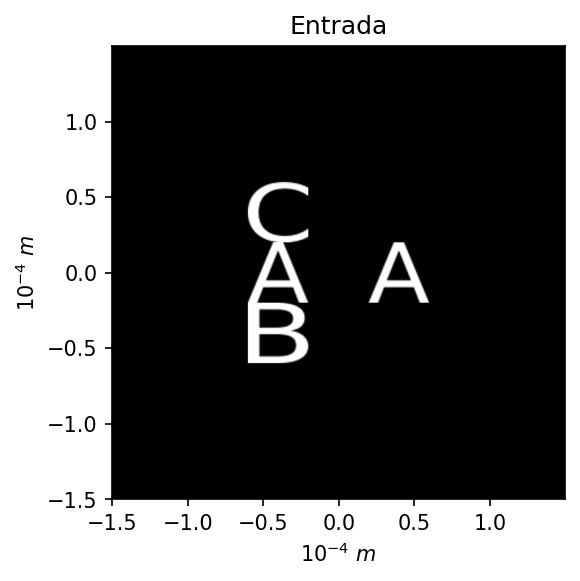

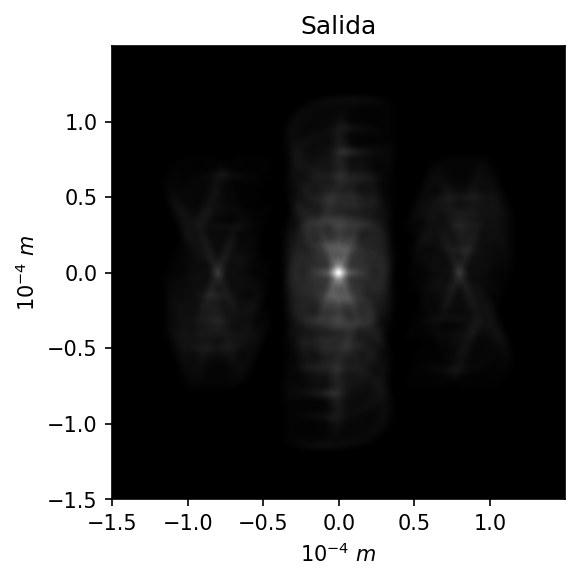

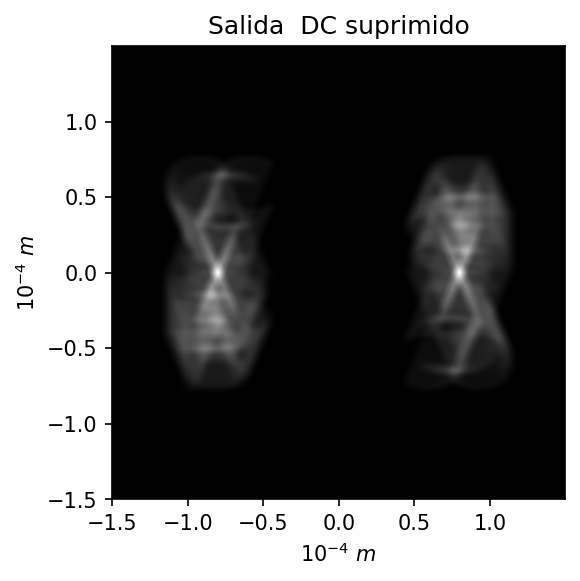

In [ ]:
M=1500
D1=200
D2=200
b=200
L=0.3e-3
dx=L/M
I=im.open('./A.png')
I=I.convert('L')
I=I.resize([D1,D1])
I=np.asarray(I)
I=I*1.
I=I/np.max(np.max(I))
I1=I-np.min(np.min(I))
I=im.open('./B.png')
I=I.convert('L')
I=I.resize([D1,D1])
I=np.asarray(I)
I=I*1.
I=I/np.max(np.max(I))
I2=I-np.min(np.min(I))
I=im.open('./C.png')
I=I.convert('L')
I=I.resize([D1,D1])
I=np.asarray(I)
I=I*1.
I=I/np.max(np.max(I))
I3=I-np.min(np.min(I))

I=im.open('./A.png')
I=I.convert('L')
I=I.resize([D1,D1])
I=np.asarray(I)
I=I*1.
I=I/np.max(np.max(I))
I4=I-np.min(np.min(I))


x1=np.linspace(-L/2,L/2-dx,M)
y1=np.linspace(-L/2,L/2-dx,M)

zc=dx*L/wl
ug=np.zeros([M,M])
ug=fusion(ug,I1,-b,0)
ug=fusion(ug,I2,-b,b)
ug=fusion(ug,I3,-b,-b)
ug=fusion(ug,I4,b,0)
    
fig = plt.figure(dpi=150)
plt.imshow(np.abs(ug)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Entrada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()
UG=tfoptica(ug,wl,dx,zc)
Ig=UG*np.conj(UG)



sg=tfoptica(Ig,wl,dx,zc)


fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Salida')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

sg=fusion(sg,np.zeros([1200,400]),0,0)
fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Salida  DC suprimido')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

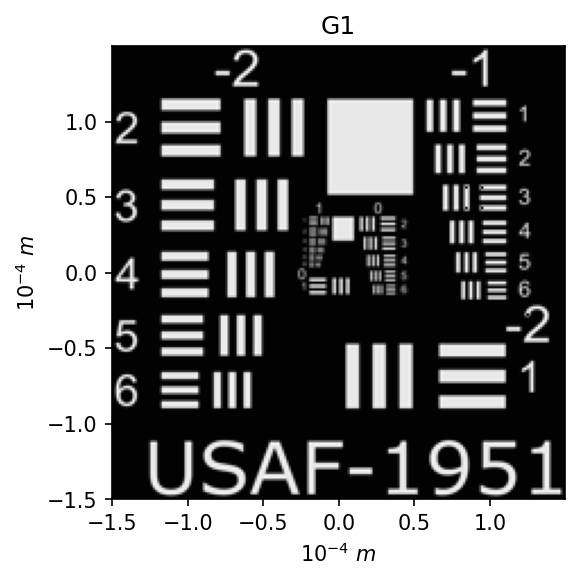

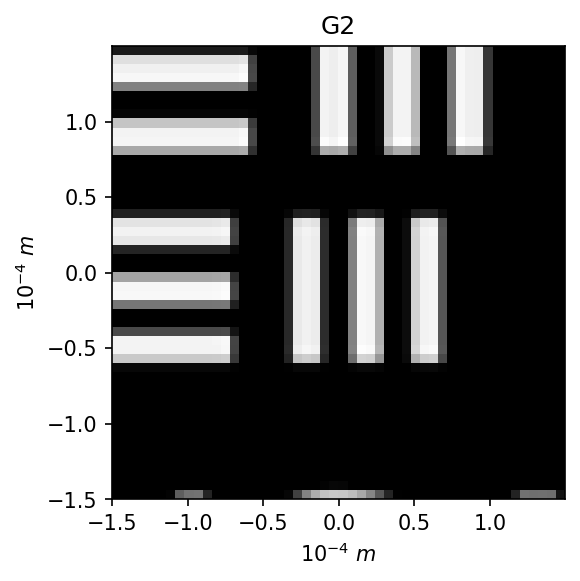

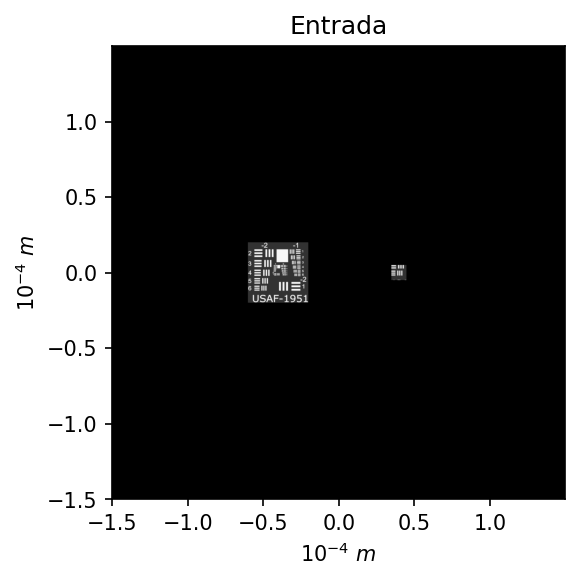

In [ ]:
M=1500
D1=200
D2=200
b=200
L=0.3e-3
dx=L/M
I=im.open('./6.bmp')


I=I.resize([D1,D1])
I=1-np.asarray(I)
I=I*1.
I=I/np.max(np.max(I))
I1=I-np.min(np.min(I))

#Filtro paso bajo
I2=tajada(I1,np.zeros([50,50]),-50,50)


x1=np.linspace(-L/2,L/2-dx,M)
y1=np.linspace(-L/2,L/2-dx,M)

zc=dx*L/wl
ug=np.zeros([M,M])
ug=fusion(ug,I1,-b,0)
ug=fusion(ug,I2,b,0)

    
fig = plt.figure(dpi=150)
plt.imshow(np.abs(I1)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('G1')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()
fig = plt.figure(dpi=150)
plt.imshow(np.abs(I2)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('G2')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()
fig = plt.figure(dpi=150)
plt.imshow(np.abs(ug)**(1/3), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Entrada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

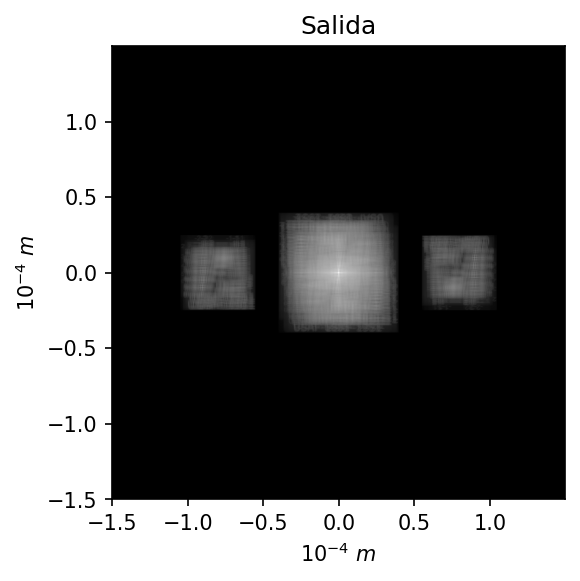

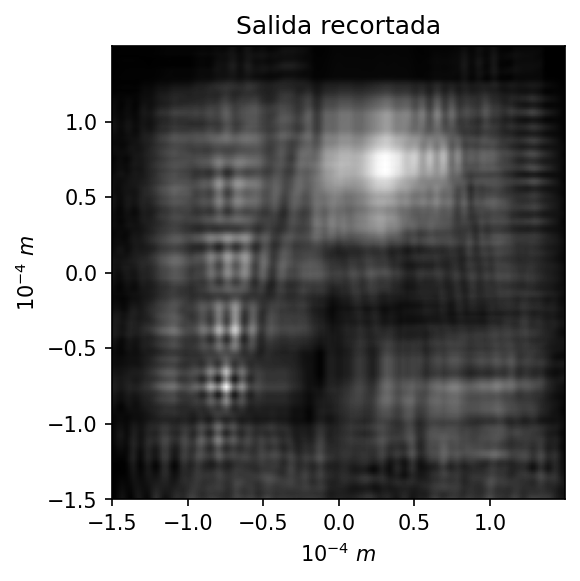

In [ ]:
UG=tfoptica(ug,wl,dx,zc)
Ig=UG*np.conj(UG)



sg=tfoptica(Ig,wl,dx,zc)



fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg)**(1/4), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Salida')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

sg=tajada(sg,np.zeros([D1,D1]),-2*b,0)
fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Salida recortada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

## Filtros convolutivos

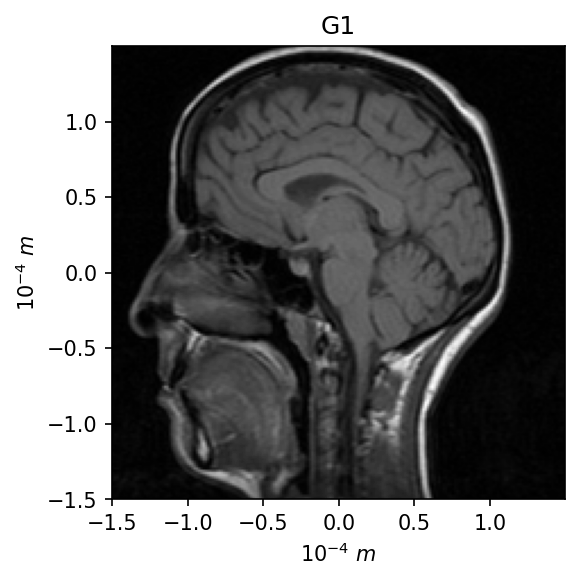

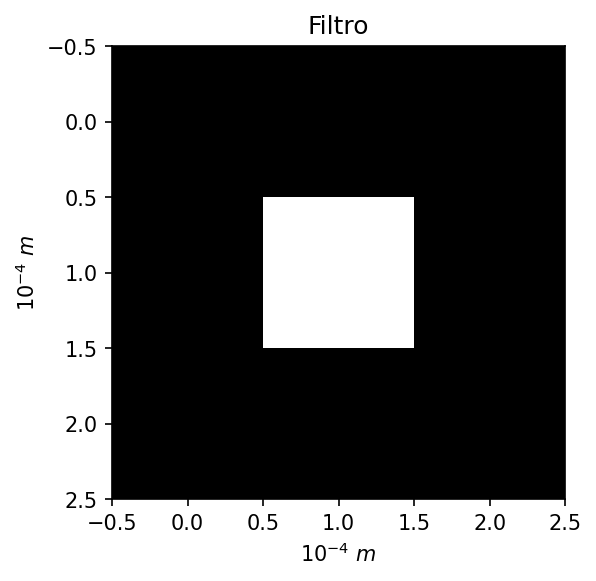

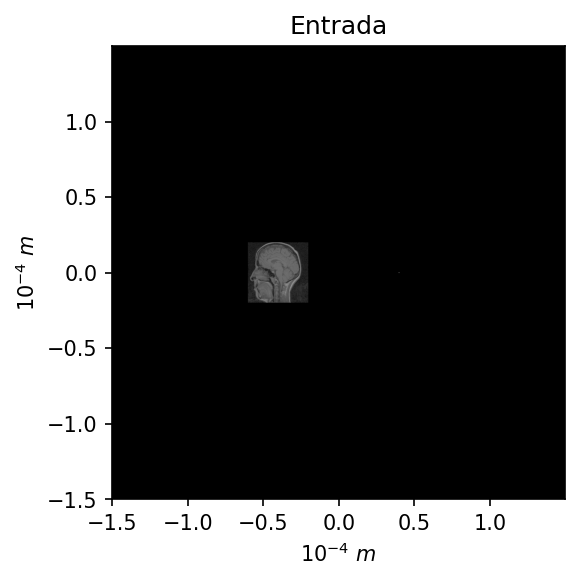

In [ ]:
M=1500
D1=200
D2=200
b=200
L=0.3e-3
dx=L/M
I=im.open('./head.bmp')


I=I.resize([D1,D1])
I=I.convert('L')
I=np.asarray(I)

I=I*1.
I=I/np.max(np.max(I))
I1=I-np.min(np.min(I))


#Filtro sharpen
H=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])


#Filtro gaussiano 3x3
#H=1/9*np.array([[1,2,1],[2,4,2],[1,2,1]])


#Filtro realze bordes
#H=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]);

#Filtro gaussiano 5x5
#H=1/256*np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

I2=H
x1=np.linspace(-L/2,L/2-dx,M)
y1=np.linspace(-L/2,L/2-dx,M)

zc=dx*L/wl
ug=np.zeros([M,M])
ug=fusion(ug,I1,-b,0)
ug=fusion(ug,I2,b,0)

    
fig = plt.figure(dpi=150)
plt.imshow(np.abs(I1)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('G1')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()
fig = plt.figure(dpi=150)
plt.imshow(np.abs(I2)**(4), cmap='gray')
plt.title('Filtro')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()
fig = plt.figure(dpi=150)
plt.imshow(np.abs(ug)**(1/3), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Entrada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

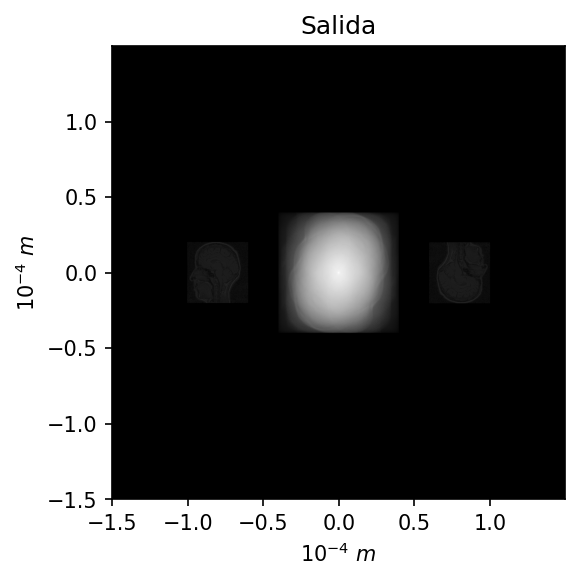

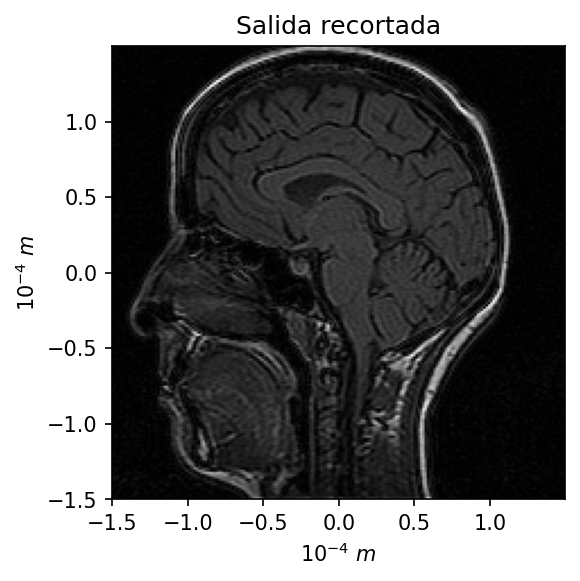

In [ ]:
UG=tfoptica(ug,wl,dx,zc)
Ig=UG*np.conj(UG)



sg=tfoptica(Ig,wl,dx,zc)



fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg)**(1/4), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Salida')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

sg=tajada(sg,np.zeros([D1,D1]),-2*b,0)

fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Salida recortada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

## Restauracion de imagen y filtros inversos

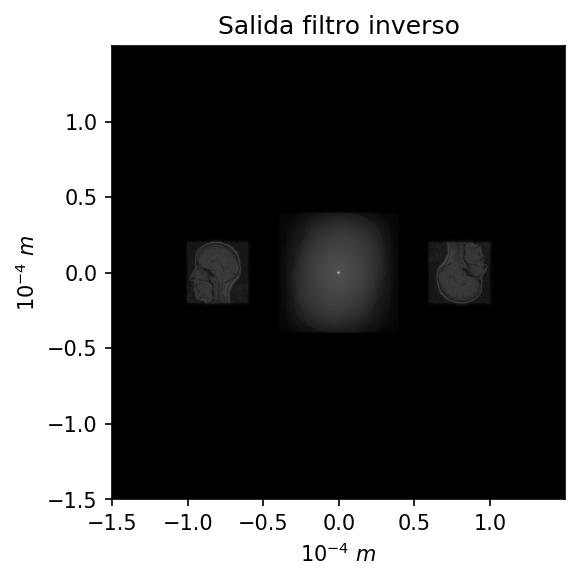

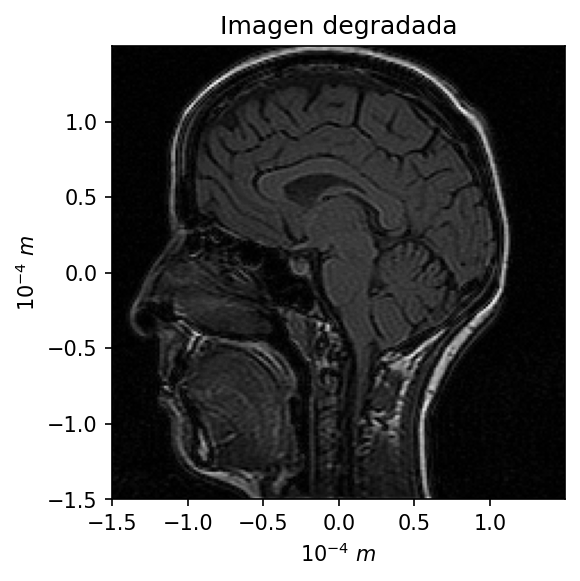

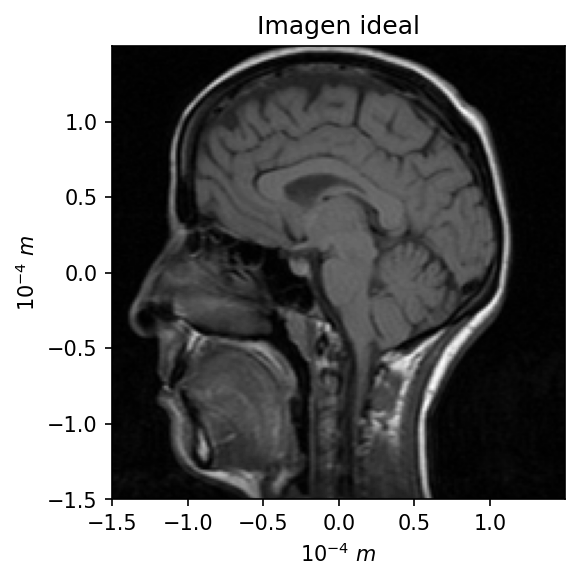

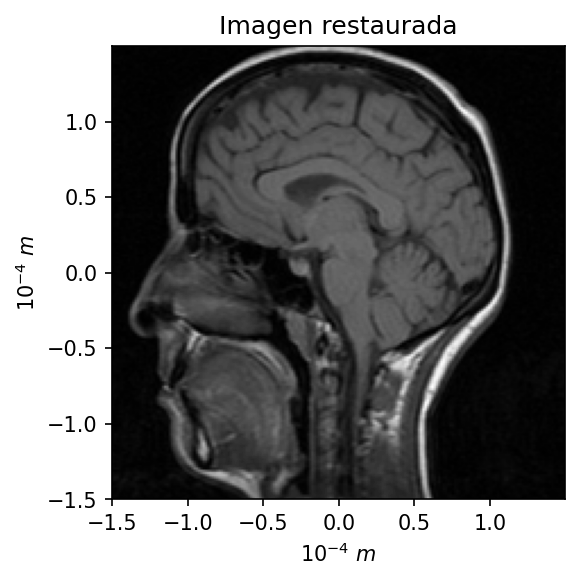

In [ ]:
sg1=(sg)


Hinv=fusion(np.zeros([200,200]),H,0,0)
Hinv=sft.fftshift(sft.fft2(sft.fftshift(Hinv)))
Hinv=Hinv/(Hinv*np.conj(Hinv)+0.000001)
Hinv=sft.fftshift(sft.ifft2(sft.fftshift(Hinv)))

I2=(Hinv)
ug=np.zeros([M,M])*1j
ug=fusion(ug,sg1,-b,0)
ug=fusion(ug,I2,b,0)
UG=tfoptica(ug,wl,dx,zc)
Ig=UG*np.conj(UG)
sg2=tfoptica(Ig,wl,dx,zc)



fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg2)**(1/4), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Salida filtro inverso')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

sg2=tajada(sg2,np.zeros([D1,D1]),-2*b,0)

fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg1)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Imagen degradada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()
fig = plt.figure(dpi=150)
plt.imshow(np.abs(I1)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Imagen ideal')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()

fig = plt.figure(dpi=150)
plt.imshow(np.abs(sg2)**(1), cmap='gray',extent=[np.min(x1*1E4),np.max(x1*1E4),np.min(y1*1E4),np.max(y1*1E4)])
plt.title('Imagen restaurada')
plt.xlabel('$10^{-4}$ $m$')
plt.ylabel('$10^{-4}$ $m$')
plt.show()